# LSTM 전력 수요 예측 

### <목차>

#### 1. 모듈 임포트
<br/>

#### 2. 데이터 합본 저장
##### ㅤ-3년치 데이터
##### ㅤ-4년치 데이터
<br/>

#### 3. 그래프 확인
##### ㅤ-각 연도별 csv 데이터 로드
##### ㅤ-plt 그래프 함수
##### ㅤ-2013
##### ㅤ-2014
##### ㅤ-2015
##### ㅤ-2013-2015
<br/>

#### 4. 데이터 정규화 
##### ㅤ-Min-Max Scaling 이용, 4년치 학습 데이터 정규화
<br/>

#### 5. 데이터 연관성 분석
<br/>

#### 6. 이상치 처리
##### ㅤ-이상치 확인 함수 생성
##### ㅤ-분위별 이상치 1차 검색
##### ㅤ-이상치 치환
##### ㅤ-처리 후 잔여 개수 확인
<br/>

#### 7. 데이터셋 편집
<br/>

#### 8. 딥러닝 모델
<br/>

#### 9. 결과 표시
##### ㅤ-그래프 표시
##### ㅤ-그래프 비교 결과
##### ㅤ-성능 측정 지표
<br/>

#### 10. 예측값과 실제값 결과 csv 파일 저장
##### ㅤ-1년 단위 저장
##### ㅤ-1달 단위 저장
##### ㅤ-일주일 단위 저장

### <화면 가로 확장>

In [1]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 1. 모듈 임포트

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf
import csv
import os
import datetime

### <GPU 확인>

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

### 2. 데이터 합본 저장

#### 3년치 데이터

In [4]:
df_3Y = pd.DataFrame()
for y in range(2013, 2016):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_3Y = pd.concat([df_3Y, df_y])
    
df_3Y = df_3Y.drop([df_3Y.columns[0]], axis=1)
df_3Y = df_3Y.reset_index(drop=True)
df_3Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-15.csv", encoding='cp949')

In [5]:
Data_3Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-15.csv', encoding='cp949')
Data_3Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26280 non-null  int64  
 1   DateTime    26280 non-null  int64  
 2   Graph_Date  26280 non-null  object 
 3   Day         26280 non-null  object 
 4   Holiday     26280 non-null  int64  
 5   Seq         26280 non-null  int64  
 6   Watt        26280 non-null  int64  
 7   Temp        26280 non-null  float64
 8   CPI         26280 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.8+ MB


#### 4년치 데이터

In [17]:
df_4Y = pd.DataFrame()
for y in range(2013, 2017):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_4Y = pd.concat([df_4Y, df_y])
    
df_4Y = df_4Y.drop([df_4Y.columns[0]], axis=1)
df_4Y = df_4Y.reset_index(drop=True)
df_4Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-16.csv", encoding='cp949')

In [18]:
Data_4Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-16.csv', encoding='cp949')
Data_4Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35040 non-null  int64  
 1   DateTime    35040 non-null  int64  
 2   Graph_Date  35040 non-null  object 
 3   Day         35040 non-null  object 
 4   Holiday     35040 non-null  int64  
 5   Seq         35040 non-null  int64  
 6   Watt        35040 non-null  int64  
 7   Temp        35040 non-null  float64
 8   CPI         35040 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


### 3. 그래프 확인

#### 각 연도별 csv 데이터 로드

In [8]:
Data_2013=pd.read_csv('./Combined_Data/2013_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2014=pd.read_csv('./Combined_Data/2014_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2015=pd.read_csv('./Combined_Data/2015_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2016=pd.read_csv('./Combined_Data/2016_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')

#### Plt 그래프 함수

In [ ]:
def Watt_Graph(name, x, y, year):
    font_head = {'color': 'k', 'weight': 'bold', 'size': 20}
    font_body = {'color': 'k', 'weight': 'bold', 'size': 15}
    plt.figure(figsize=(30,10))
    plt.plot(x, y, '.-', linewidth=1, color='y')
    plt.tick_params(axis='x', colors='k', size=10, labelsize=15)
    plt.tick_params(axis='y', colors='k', size=10, labelsize=15)
    plt.xlabel("Time", labelpad=15, fontdict=font_body)
    plt.ylabel('Watt', labelpad=15, fontdict=font_body)
    plt.title(name, fontdict=font_head, pad=20)
    plt.margins(x=0.02)

    if year==1:
        plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if year==3:
        plt.xticks([0, 365, 730], labels=['2013', '2014', '2015'])
        
    plt.show

In [9]:
def Weather_Graph(name1, name2, x, y1, y2, year):
    plt.figure(figsize=(30,20))
    font_head = {'color': 'k', 'weight': 'bold', 'size': 20}
    font_body = {'color': 'k', 'weight': 'bold', 'size': 15}

    # 1번째 그래프
    ax1 = plt.subplot(2, 1, 1)
    ax1.spines['left'].set_color('#ff7f0e')
    ax1.spines['left'].set_lw(2)
    ax1.spines['bottom'].set_color('#ff7f0e')
    ax1.spines['bottom'].set_lw(2)

    ax1.tick_params(axis='x', colors='k', size=10, labelsize=15)
    ax1.tick_params(axis='y', colors='k', size=10, labelsize=15)

    plt.plot(x, y1, '.-', color='#ff7f0e', linewidth=1)
    plt.title(name1, fontdict=font_head, pad=20)
    plt.xticks(visible=False)
    plt.ylabel("Temp('C)",labelpad=15, fontdict=font_body)
    
    # 2번째 그래프
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.spines['left'].set_color('royalblue')
    ax2.spines['left'].set_lw(2)
    ax2.spines['bottom'].set_color('royalblue')
    ax2.spines['bottom'].set_lw(2)

    ax2.tick_params(axis='x', colors='k', size=10, labelsize=15)
    ax2.tick_params(axis='y', colors='k', size=10, labelsize=15)

    plt.plot(x, y2, '.-', color='#1f77b4', linewidth=1)
    plt.title(name2, fontdict=font_head, pad=20)
    plt.xlabel('Time',labelpad=15, fontdict=font_body)
    plt.ylabel('Humidity(%)',labelpad=15, fontdict=font_body)
    
    plt.margins(x=0.02)
    
    if year==1:
        plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if year==3:
        plt.xticks([0, 365, 730], labels=['2013', '2014', '2015'])

    plt.show()

#### 1년치 그래프 확인

#### 2013

In [ ]:
Watt_Graph("2013's Time-Watt Graph", Data_2013['Graph_Date'], Data_2013['Watt'], 1)
Weather_Graph("2013's Time-Temp Graph", "2013's Time-Humidity Graph", Data_2013['Graph_Date'], Data_2013["Temp('C)"], Data_2013['Humidity(%)'], 1)

#### 2014

In [ ]:
Watt_Graph("2014's Time-Watt Graph", Data_2014['Graph_Date'], Data_2014['Watt'], 1)
Weather_Graph("2014's Time-Temp Graph", "2014's Time-Humidity Graph", Data_2014['Graph_Date'], Data_2014["Temp('C)"], Data_2014['Humidity(%)'], 1)

#### 2015

In [ ]:
Watt_Graph("2015's Time-Watt Graph", Data_2015['Graph_Date'], Data_2015['Watt'], 1)
Weather_Graph("2015's Time-Temp Graph", "2015's Time-Humidity Graph", Data_2015['Graph_Date'], Data_2015["Temp('C)"], Data_2015['Humidity(%)'], 1)

#### 3년치 데이터 그래프 확인

#### 2013-2015

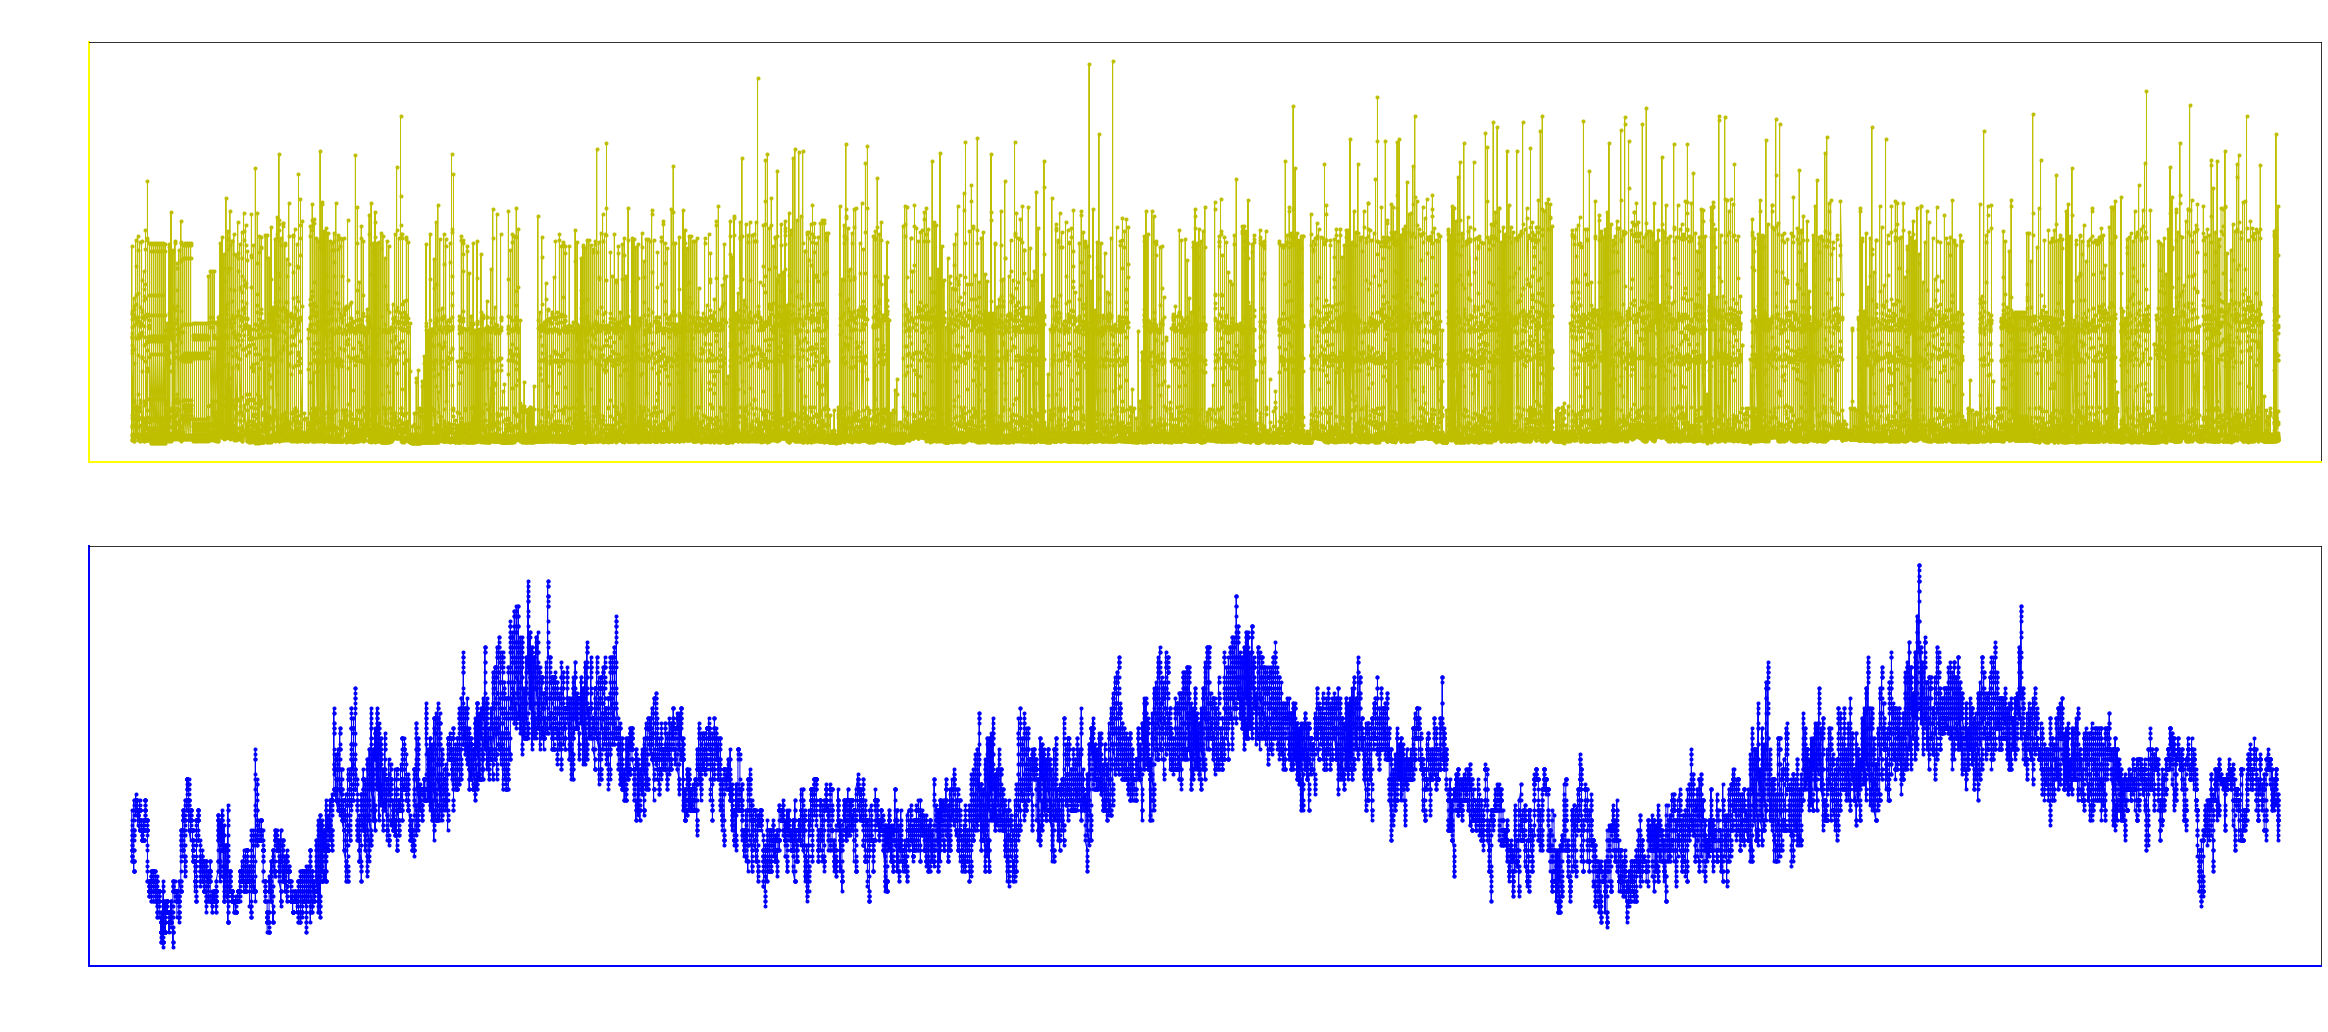

In [30]:
Watt_Graph("13-15's Time-Watt Graph", Data_3Y['Graph_Date'], Data_3Y['Watt'], 3)
Weather_Graph("13-15's Time-Temp Graph", "13-15's Time-Humidity Graph", Data_3Y['Graph_Date'], Data_3Y["Temp('C)"], Data_3Y['Humidity(%)'], 3)

### 4. 데이터 정규화

#### Min-Max Scaling 이용, 4년치 학습 데이터 정규화

In [19]:
from sklearn.preprocessing import MinMaxScaler

# 정규화 과정을 거쳐 데이터 범위를 원하는 범위로 제한. 그래프는 동일하나 손실 정도를 확인하기에 더 좋음.
# 배치 정규화는 기울기 소멸 문제를 해결하기는 좋으나, RNN의 경우 계층별로 미니 정규화 적용이 필요해 모델이 복잡해지고 효율이 저하됨.
Data_4Y.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Holiday', 'Watt', "Temp('C)", 'Humidity(%)', 'CPI']
Data_4Y_scaled = scaler.fit_transform(Data_4Y[scale_cols])
Data_4Y_scaled = pd.DataFrame(Data_4Y_scaled)
Data_4Y_scaled.columns = scale_cols

Data_4Y_scaled.insert(0, 'DateTime', Data_4Y['DateTime'])
Data_4Y_scaled.insert(1, 'Graph_Date', Data_4Y['Graph_Date'])
Data_4Y_scaled

,DateTime,Graph_Date,Holiday,Watt,Temp,CPI
0,20130101,2013-01-01,1.0,0.270038,0.360000,0.933333
1,20130101,2013-01-01,1.0,0.268530,0.333333,0.933333
2,20130101,2013-01-01,1.0,0.263775,0.320000,0.933333
3,20130101,2013-01-01,1.0,0.011368,0.306667,0.933333
4,20130101,2013-01-01,1.0,0.010788,0.306667,0.933333
...,...,...,...,...,...,...
35035,20161231,2016-12-31,1.0,0.024707,0.333333,0.566667
35036,20161231,2016-12-31,1.0,0.182809,0.333333,0.566667
35037,20161231,2016-12-31,1.0,0.089781,0.306667,0.566667
35038,20161231,2016-12-31,1.0,0.049878,0.306667,0.566667


### 5. 데이터 연관성 분석

In [20]:
import scipy.stats as stats

# 피어슨 stat을 이용하면 피어슨 상관계수와 p-value값이 출력되는데 상관계수는 양 or 음의 비례관계 정도를, p-value는 상관 정도를 보여준다. (0에 가까울수록 영향이 크다.)

Correlation=stats.pearsonr(Data_4Y_scaled['Holiday'], Data_4Y_scaled['Watt'])
print('< Holiday - Watt >')
print('P-value ==>> %.3f\n' %Correlation[1])

Correlation=stats.pearsonr(Data_4Y_scaled["Temp('C)"], Data_4Y_scaled['Humidity(%)'])
print('< Temp - Humidity >')
print('P-value ==>> %.3f\n' %Correlation[1])

Correlation=stats.pearsonr(Data_4Y_scaled["Temp('C)"], Data_4Y_scaled['Watt'])
print('< Temp - Watt >')
print('P-value ==>> %.3f\n' %Correlation[1])

Correlation=stats.pearsonr(Data_4Y_scaled['Humidity(%)'], Data_4Y_scaled['Watt'])
print('< Humidity - Watt >')
print('P-value ==>> %.3f\n' %Correlation[1])

Correlation=stats.pearsonr(Data_4Y_scaled['CPI'], Data_4Y_scaled['Watt'])
print('< CPI - Watt >')
print('P-value ==>> %.3f\n' %Correlation[1])

< Holiday - Watt >
P-value ==>> 0.000

< Temp - Watt >
P-value ==>> 0.169

< CPI - Watt >
P-value ==>> 0.000



### 6. 이상치 처리

#### 이상치 확인 함수 생성

In [27]:
def get_outlier(df=None, column=None, weight=None):
    quantile_5 = np.percentile(df[column].values, 5)
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_50 = np.percentile(df[column].values, 50)
    quantile_75 = np.percentile(df[column].values, 75)
    quantile_95 = np.percentile(df[column].values, 95)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight

    lowest_val = quantile_25-IQR_weight
    highest_val = quantile_75+IQR_weight
    
    outlier_index_lowest = df[column][df[column] < quantile_5].index
    outlier_index_low = df[column][df[column] < lowest_val].index
    outlier_index_high = df[column][df[column] > highest_val].index
    outlier_index_highest = df[column][df[column] > quantile_95].index
    
    return outlier_index_lowest, outlier_index_low, outlier_index_high, outlier_index_highest, quantile_5, quantile_25, quantile_50, quantile_75, quantile_95

#### 분위별 이상치 1차 검색

In [29]:
WEIGHT=2.5
Lowest_list = get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[0]
Highest_list = get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[3]

print('Lowest Outlier ==>> {}\n'.format(Lowest_list))
print('Low Outlier ==>> {}\n'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[1]))
print('High Outlier ==>> {}\n'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[2]))
print('Highest Outlier ==>> {}\n'.format(Highest_list))

print('5% Value ==>> {}\n'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[4]))
print('25% Value ==>> {}\n'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[5]))
print('50% Value ==>> {}\n'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[6]))
print('75% Value ==>> {}\n'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[7]))
print('95% Value ==>> {}'.format(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[8]))

Low Outlier ==>> Int64Index([], dtype='int64')

High Outlier ==>> Int64Index([  199,  1159,  1519,  1813,  1938,  2057,  2084,  2225,  2321,
             2341,
            ...
            33225, 33537, 33761, 34063, 34193, 34309, 34429, 34906, 34907,
            35025],
           dtype='int64', length=230)

60 Outlier ==>> Int64Index([    8,    56,    66,    79,    90,   111,   131,   162,   186,
              190,
            ...
            34688, 34764, 34783, 34832, 34836, 34880, 34906, 34907, 35025,
            35026],
           dtype='int64', length=2084)

25% Value ==>> 0.014499478018791326

50% Value ==>> 0.03932258438696207

60% Value ==>> 0.06507365734833545

75% Value ==>> 0.24834705950585778


#### 이상치 치환 (조정된 외부 울타리)

In [ ]:
WEIGHT_2R=np.sqrt(WEIGHT)

for i in range(len(Lowest_list)):
    Data_4Y_scaled['Watt'][Lowest_list[i]] = Data_4Y_scaled['Watt'][Lowest_list[i]]*WEIGHT_2R
    
for i in range(len(Highest_list)):
    Data_4Y_scaled['Watt'][Highest_list[i]] = Data_4Y_scaled['Watt'][Highest_list[i]]/WEIGHT_2R

#### 이상치 처리 후 잔여 개수 확인

In [32]:
print('Quantity of Low Outlier ==>> {}\n'.format(len(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[1])))
print('Quantity of High Outlier ==>> {}\n'.format(len(get_outlier(df=Data_4Y_scaled, column='Watt', weight=WEIGHT)[2])))

Quantity of Low Outlier ==>> 0

Quantity of High Outlier ==>> 0



### 7. 데이터셋 편집

In [33]:
TEST_SIZE = 8760 # 1년치를 테스트셋으로 사용
WINDOW_SIZE = 1 # 얼마 동안의 과거 기반의 데이터에 기반하여 다음날의 값을 예측할 것인지 설정. 
BATCH_SIZE = 128
VAL_RATIO = 0.3

# train과 test셋 분할
learning = Data_4Y_scaled[:-TEST_SIZE]
VAL_SIZE = int(len(learning)*VAL_RATIO) # 비율로 계산하는게 아니라면 1년 8760개를 validation size로 설정할 수도 있음. (추후결정)
train = learning[:-VAL_SIZE]
val = learning[-VAL_SIZE:]
test= Data_4Y_scaled[-TEST_SIZE:]

In [34]:
def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [35]:
from sklearn.model_selection import train_test_split

feature_cols = ['Holiday', 'Watt', "Temp('C)", 'Humidity(%)', 'CPI']
label_cols = ['Watt']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)# 여기서도 일자 설정

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=VAL_RATIO, shuffle=False)

In [36]:
print(' x_train >> {0}\n x_valid >> {1}\n y_train >> {2}\n y_valid >> {3}'.format(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape))

 x_train >> (21023, 1, 4)
 x_valid >> (5256, 1, 4)
 y_train >> (21023, 1)
 y_valid >> (5256, 1)


In [37]:
x_test = test[feature_cols]
y_test = test[label_cols]

In [38]:
def make_testset(x, y, size):
    x=x.values.tolist()
    y=y.values.tolist()
    x=np.array(x)
    y=np.array(y)
    x=x.reshape(len(x), size, x.shape[1])
    y=y.reshape(len(y), y.shape[1])
    return x, y

In [39]:
x_test, y_test = make_testset(x_test, y_test, 1)

### 8. 딥러닝 모델

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import TimeDistributed
import keras
LeakyReLU=tf.keras.layers.LeakyReLU(alpha=0.016)
tf.debugging.set_log_device_placement(True)

with tf.device('/GPU:0'):
    model = Sequential()
    model.add(TimeDistributed(Dense(16), input_shape=(train_feature.shape[1], train_feature.shape[2])))
    #model.add(LSTM(16, activation='ReLU', input_shape=(train_feature.shape[1], train_feature.shape[2]), return_sequences=True))
    model.add(Bidirectional(LSTM(16, activation='LeakyReLU', return_sequences=True), merge_mode='ave'))
    model.add(Bidirectional(LSTM(16, activation='v', return_sequences=False), merge_mode='ave'))
    model.add(Dense(1, activation = 'LeakyReLU'))
    model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Qr in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DiagPart in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sign in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Transpose in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Qr in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DiagPart in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sign in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Transpose in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op DiagPart in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sign in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Transpose in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:

#### Plot model 저장

In [ ]:
from keras.utils.vis_utils import plot_model
import pydot
import pydotplus
import graphviz

plot_model(model, to_file='./Result/LSTM/model.png')
plot_model(model, to_file='./Result/LSTM/model_shapes.png', show_shapes=True)

#### 학습

In [ ]:
import os

# 시간 표시, 측정용
now = datetime.datetime.now() # 현재 시각
TimeNow = now.strftime('%Y-%m-%d  %H:%M:%S') # 시작 시각 표시용.

with tf.device('/GPU:0'):
    print('Start Time >>', TimeNow, '\n')
    now = datetime.datetime.now()
    start = now

    model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mse'])
    early_stop = EarlyStopping(monitor='val_loss', patience=20)

    model_path = 'model'
    filename = os.path.join(model_path, 'tmp_checkpoint_L.h5')
    checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    history = model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_valid, y_valid), callbacks=[early_stop, checkpoint])

    now = datetime.datetime.now()
    end = now
    elapsed_time = end-start
    elapsed_time = str(elapsed_time).split(".")
    elapsed_time = elapsed_time[0]
    print('소요시간 >> ', elapsed_time)

In [ ]:
model.load_weights(filename)
pred = model.predict(x_test)

pred.shape

### 9. 결과 표시

In [ ]:
try:
    os.mkdir('./Result')
    print('폴더 생성 완료.')
    
except FileExistsError:
    print('해당 폴더가 이미 존재합니다.')

In [ ]:
try:
    os.mkdir('./Result/LSTM')
    os.mkdir('./Result/LSTM/Graph')
    os.mkdir('./Result/LSTM/Data')
    print('폴더 생성 완료.')
    
except FileExistsError:
    print('해당 폴더가 이미 존재합니다.')

In [ ]:
plt.title('Model Validation Loss', size='15')
plt.xlabel('Epoch')
plt.ylabel('Val_loss')
plt.grid(True)
plt.plot(history.history['val_loss'])
plt.savefig('./Result/LSTM/Graph/Model_Valdation_Loss.png')
plt.show

In [ ]:
plt.figure(figsize=(300, 15))

plt.tick_params(axis='x', colors='blue', size=15)
plt.tick_params(axis='x', colors='blue', labelsize=12)
plt.tick_params(axis='y', colors='blue', size=15)
plt.tick_params(axis='y', colors='blue', labelsize=12)

plt.plot(pred, label = 'Prediction',color='blue')

plt.xticks([0, 31*24, 59*24, 90*24, 120*24, 151*24, 181*24, 212*24, 243*24, 273*24, 304*24, 334*24], 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], labels=['0', '2000 W', '3500 W', '5500 W', '7000 W'])

plt.margins(x=0.005)
plt.savefig('./Result/LSTM/Graph/Prediction.png')
plt.show()

In [ ]:
plt.figure(figsize=(300, 15))

plt.tick_params(axis='x', colors='darkorange', size=15)
plt.tick_params(axis='x', colors='darkorange', labelsize=12)
plt.tick_params(axis='y', colors='darkorange', size=15)
plt.tick_params(axis='y', colors='darkorange', labelsize=12)

plt.plot(y_test, label = 'Actual', color='darkorange')

plt.xticks([0, 31*24, 59*24, 90*24, 120*24, 151*24, 181*24, 212*24, 243*24, 273*24, 304*24, 334*24], 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], labels=['0', '2000 W', '3500 W', '5500 W', '7000 W'])

plt.margins(x=0.005)
plt.savefig('./Result/LSTM/Graph/Actual.png')
plt.show()

In [ ]:
plt.figure(figsize=(300, 15))

plt.tick_params(axis='x', colors='black', size=15)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(axis='y', colors='black', size=15)
plt.tick_params(axis='y', colors='black', labelsize=12)

plt.plot(pred, label = 'Prediction',color='blue')
plt.plot(y_test, label = 'Actual', color='darkorange')

plt.xticks([0, 31*24, 59*24, 90*24, 120*24, 151*24, 181*24, 212*24, 243*24, 273*24, 304*24, 334*24], 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], labels=['0', '2000 W', '3500 W', '5500 W', '7000 W'])
plt.grid(True)
plt.legend()
plt.margins(x=0.005)
plt.savefig('./Result/LSTM/Graph/Pred_with_Actual.png')
plt.show()

In [ ]:
# 월 단위 그래프 분할 표시 및 저장
for m in range(1,13):
    month = {0:0, 1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    start = {1:0, 2:744, 3:1416, 4:2160, 5:2880, 6:3624, 7:4344, 8:5088, 9:5832, 10:6552, 11:7296, 12:8016}
    end = {1:744, 2:1416, 3:2160, 4:2880, 5:3624, 6:4344, 7:5088, 8:5832, 9:6552, 10:7296, 11:8016, 12:8760}
    
    plt.figure(figsize=(30, 15))
    
    plt.title('Prediction & Actual Graph - month'+str(m), size='15')
    
    plt.tick_params(axis='x', colors='black', size=10)
    plt.tick_params(axis='x', colors='black', labelsize=12)
    plt.tick_params(axis='y', colors='black', size=10)
    plt.tick_params(axis='y', colors='black', labelsize=12)
    
    plt.plot(pred[start[m]:end[m]], label = 'Prediction',color='blue', marker='.')
    plt.plot(y_test[start[m]:end[m]], label = 'Actual', color='darkorange', marker='.')
    
    # 월별 xticks 설정 함수
    def xticks_list (days):
        xticks_list=[]
        for x in range(0,days+1):
            xticks_list.append(x*24)
        return xticks_list
    
    # month labels 설정 함수
    def month_labels (days):
        month_labels=[]
        for ml in range(1,days+1):
            month_labels.append(ml)
        month_labels.append('end') 
        return month_labels
    
    if (m==2):
        plt.xticks(xticks_list(28), labels=month_labels(28))

    if (m==4 or m==6  or m==9 or m==11):
        plt.xticks(xticks_list(30), labels=month_labels(30))
        
    if (m==1 or m==3 or m==5 or m==7 or m==8 or m==10 or m==12):
        plt.xticks(xticks_list(31), labels=month_labels(31))
        
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8], labels=['0', '2000 W', '3500 W', '5500 W', '7000 W'])
    
    plt.grid(True)
    plt.legend()
    plt.margins(x=0.005)
    plt.savefig('./Result/LSTM/Graph/Prediction_with_Actual_'+str(m)+'.png') # 이름 각각!

#### 그래프 비교 결과

In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim

In [ ]:
# 유사도 측정을 위한 이미지 가공
image1 = cv2.imread('./Result/LSTM/Graph/Prediction.png')
image2 = cv2.imread('./Result/LSTM/Graph/Actual.png')

tempDiff1 = cv2.subtract(image1, image2)

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
# 차이 추출을 위한 뺄셈 과정
pred_list=pred.tolist()
actual_list=y_test.tolist()

result_numbers=[]
for minus in range(len(pred_list)):
    result = abs(float(pred_list[minus][0]) - float(actual_list[minus][0]))
    result_numbers.append(result)

In [ ]:
(score, diff) = ssim(gray1, gray2, full=True)
sim_score = round(score,5)*100
result_num_total = round(sum(result_numbers),3)
final_score = (len(result_numbers) - result_num_total)/len(result_numbers)*100

print('그래프 유사도 ==>> %.3f %%\n' %sim_score)
print('예측차 판별도 ==>> %.3f %%' %final_score)

#### 성능 측정 지표

In [ ]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE

print('r2 >> %.4f' %r2(y_test, pred)) # 1에 가까워야 좋음
print('MAE >> %.4f' %MAE(y_test, pred)) # 0에 가까워야 좋음
print('MSE >> %.4f' %MSE(y_test, pred)) # 0에 가까워야 좋음
print('RMSE >> %.4f' %np.sqrt(MSE(y_test, pred))) # 0에 가까워야 좋음
print('RMSLE >> %.4f' %np.sqrt(MSLE(y_test, pred))) # 0에 가까워야 좋음

In [ ]:
RMSE = np.sqrt(MSE(y_test, pred))
RMSE_pct = round(1-RMSE, 5)*100
print('RMSE 측정 정확도 ==>> %.3f %%' %RMSE_pct)

### 10. 예측값과 실제값 결과 csv 파일 저장

#### 1년 단위 데이터 저장

In [ ]:
# 날짜 정보 생성
month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
datetime_list=[]

for m in range(1, 13):
    month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    for d in range(month[m]):
        d=d+1
        m=int(m)
        d=int(d)
        
        if m<=9:
            m='0'+str(m)
        if d<=9:
            d='0'+str(d)
            
        for h in range(1,25):
            elem = '2016'+'년-'+str(m)+'월-'+str(d)+'일-'+str(h)+'시'
            datetime_list.append(elem)

In [ ]:
# 넘파이 어레이를 데이터 프레임으로 변환
pred_df = pd.DataFrame(pred)
actual_df = pd.DataFrame(y_test)

In [ ]:
df_for_chart = pd.DataFrame(columns=['datetime', 'pred', 'actual'])
df_for_chart['datetime']=datetime_list
df_for_chart['pred']=pred_df
df_for_chart['actual']=actual_df
df_for_chart.to_csv("./Result/LSTM/Data/Electric_Prediction_result_data_for_Chart_Year.csv", encoding='cp949')

print('Job Done!!')

#### 1달 단위 데이터 저장

In [ ]:
pred_list=pred_df[0].tolist()
actual_list=actual_df[0].tolist()

for m in range(1,13):
    m=int(m)
    month = {0:0, 1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    start = {1:0, 2:744, 3:1416, 4:2160, 5:2880, 6:3624, 7:4344, 8:5088, 9:5832, 10:6552, 11:7296, 12:8016}
    end = {1:744, 2:1416, 3:2160, 4:2880, 5:3624, 6:4344, 7:5088, 8:5832, 9:6552, 10:7296, 11:8016, 12:8760}
    
    df_for_chart = pd.DataFrame(columns=['datetime', 'pred', 'actual'])
    df_for_chart['datetime']=datetime_list[start[m]:end[m]]
    df_for_chart['pred']=pred_list[start[m]:end[m]]
    df_for_chart['actual']=actual_list[start[m]:end[m]]
    
    if m<=9:
        m=str(m)
        m='0'+m
        
    df_for_chart.to_csv("./Result/LSTM/Data/Electric_Prediction_result_data_for_Chart_"+str(m)+".csv", encoding='cp949')
    
print('Job Done!!')

#### 일주일 단위 데이터 저장

In [ ]:
try:
    os.mkdir('./Result/LSTM/Data/Week')
    print('폴더 생성 완료.')
    
except FileExistsError:
    print('해당 폴더가 이미 존재합니다.')

In [ ]:
count=0
for w in range(0, 8760-168, 168):
    count=int(count)
    count+=1
    start=w
    end=w+168
    
    df_for_chart = pd.DataFrame(columns=['datetime', 'pred', 'actual'])
    df_for_chart['datetime']=datetime_list[start:end]
    df_for_chart['pred']=pred_list[start:end]
    df_for_chart['actual']=actual_list[start:end]
    
    if count<=9:
        count=str(count)
        count='0'+count
        
    df_for_chart.to_csv("./Result/LSTM/Data//Week/Electric_Prediction_result_data_for_Chart_week"+str(count)+".csv", encoding='cp949')
    
print('Job Done!!')